## Example image compression

In [79]:

#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [2]:

image = plt.imread('./imgs/babuino_mandris.jpg')

In [10]:
#print(image)

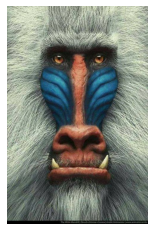

In [5]:

def print_image(image):
    plt.axis('off')
    plt.imshow(image)
    
print_image(image)

In [8]:
image.shape

(736, 474, 3)

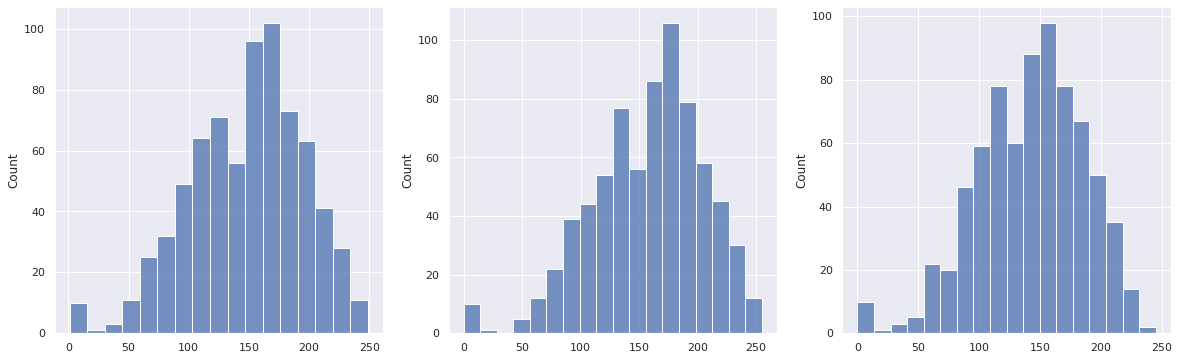

In [24]:

fig, axes = plt.subplots(1,3, figsize=(20,6))
#axes.hist(image[:,0,0])

sns.histplot(image[:,0,0], ax=axes[0])
sns.histplot(image[:,0,1], ax=axes[1])
sns.histplot(image[:,0,2], ax=axes[2])
plt.show()

In [65]:

pixel_matrix = np.reshape(image, (736*474,3))

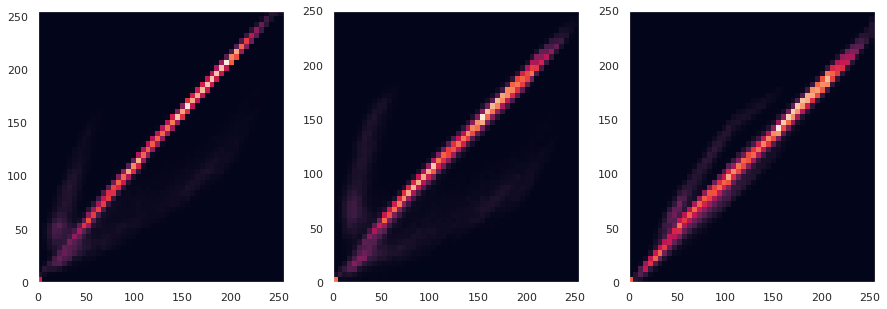

In [78]:

fig, (axe1, axe2, axe3) = plt.subplots(1, 3, figsize=(15,5))

axe1.hist2d(pixel_matrix[:,0], pixel_matrix[:,1], bins=(50,50))
axe2.hist2d(pixel_matrix[:,0], pixel_matrix[:,2], bins=(50,50))
axe3.hist2d(pixel_matrix[:,1], pixel_matrix[:,2], bins=(50,50))

plt.show()

In [85]:

pixel_dataFrame = pd.DataFrame(pixel_matrix, columns=['Red','Green','Blue']); pixel_dataFrame


,Red,Green,Blue
0,175,194,172
1,143,162,140
2,121,140,118
3,119,137,115
4,140,157,138
...,...,...,...
348859,2,3,5
348860,10,11,13
348861,1,2,4
348862,0,0,2


In [86]:
pixel_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348864 entries, 0 to 348863
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Red     348864 non-null  uint8
 1   Green   348864 non-null  uint8
 2   Blue    348864 non-null  uint8
dtypes: uint8(3)
memory usage: 1022.2 KB


In [89]:
pixel_dataFrame.describe()

,Red,Green,Blue
count,348864.000000,348864.000000,348864.000000
mean,118.543094,123.604714,114.011721
std,62.310168,61.438919,54.948377
min,0.000000,0.000000,0.000000
25%,65.000000,72.000000,70.000000
50%,119.000000,120.000000,112.000000
75%,172.000000,176.000000,159.000000
max,255.000000,255.000000,250.000000


In [100]:
normalized_pixelDF = (pixel_dataFrame-pixel_dataFrame.mean())/pixel_dataFrame.std()

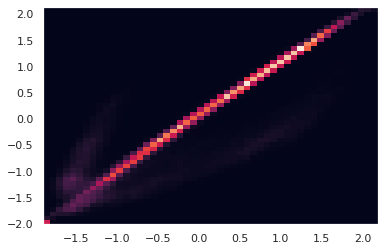

In [104]:

a = np.array(normalized_pixelDF)
plt.hist2d(a[:,0], a[:,1], bins=(50,50))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


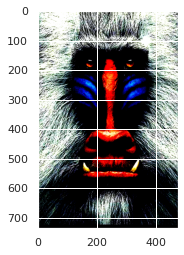

In [101]:

plt.imshow(np.array(normalized_pixelDF).reshape(736, 474, 3))
plt.show()

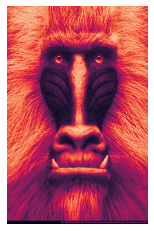

In [62]:

plt.imshow(image[:,:,0])
plt.axis('off')
plt.show()

In [50]:
image[:,:,0].shape

(736, 474)

### Aplicando SVD

In [51]:

U, Sigma_vet, Vt = np.linalg.svd(image[:,:,0])
Sigma = np.diag(Sigma_vet)

In [55]:

def reconstrucao_aproximada(U, Sigma, Vt, k):
    return U[:,:k] @ Sigma[:k,:k] @ Vt[:k,:]

img_posto_3 = reconstrucao_aproximada(U, Sigma, Vt, 100)

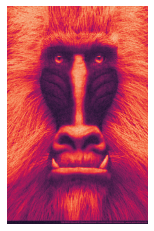

In [56]:
print_image(img_posto_3)